In [1]:
from __future__ import print_function
# Load data and imports
import numpy as np
from sklearn.model_selection import GridSearchCV
from numpy import array, asarray, zeros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard

# Hyperas for hyperparameter selection
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from keras import backend as k
tf.compat.v1.disable_eager_execution()

In [2]:
import os 
os.chdir('/Users/necromancerchenmy/Desktop/honours thesis/thesis/thesis proposal/NLP tutorial')
dataset= np.loadtxt('Pima_data.txt', delimiter=',')
np.random.seed(7)

X= dataset[:,0:8]; y= dataset[:,8]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
# 1. Tanh model weights callback
model_t4= Sequential()
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t4.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

weights_dict_t4 = {}  # key: epoch.  value: weights-bias for all layers
weights_callback_t4 = LambdaCallback \
( on_epoch_end=lambda epoch, logs:  weights_dict_t4.update({epoch:model_t4.get_weights()}))

model_t4.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[weights_callback_t4])



Train on 537 samples, validate on 231 samples
Epoch 1/100
537/537 - 0s - loss: 0.6599 - accuracy: 0.6387 - val_loss: 0.6292 - val_accuracy: 0.7143
Epoch 2/100
537/537 - 0s - loss: 0.6180 - accuracy: 0.7132 - val_loss: 0.5819 - val_accuracy: 0.7489
Epoch 3/100
537/537 - 0s - loss: 0.5811 - accuracy: 0.7318 - val_loss: 0.5389 - val_accuracy: 0.7662
Epoch 4/100
537/537 - 0s - loss: 0.5512 - accuracy: 0.7486 - val_loss: 0.5051 - val_accuracy: 0.7662
Epoch 5/100
537/537 - 0s - loss: 0.5299 - accuracy: 0.7635 - val_loss: 0.4805 - val_accuracy: 0.7792
Epoch 6/100
537/537 - 0s - loss: 0.5160 - accuracy: 0.7579 - val_loss: 0.4627 - val_accuracy: 0.7879
Epoch 7/100
537/537 - 0s - loss: 0.5060 - accuracy: 0.7561 - val_loss: 0.4519 - val_accuracy: 0.7879
Epoch 8/100
537/537 - 0s - loss: 0.4998 - accuracy: 0.7616 - val_loss: 0.4457 - val_accuracy: 0.7879


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Epoch 9/100
537/537 - 0s - loss: 0.4944 - accuracy: 0.7598 - val_loss: 0.4394 - val_accuracy: 0.7879
Epoch 10/100
537/537 - 0s - loss: 0.4902 - accuracy: 0.7654 - val_loss: 0.4362 - val_accuracy: 0.7835
Epoch 11/100
537/537 - 0s - loss: 0.4882 - accuracy: 0.7672 - val_loss: 0.4326 - val_accuracy: 0.7835
Epoch 12/100
537/537 - 0s - loss: 0.4854 - accuracy: 0.7747 - val_loss: 0.4323 - val_accuracy: 0.7749
Epoch 13/100
537/537 - 0s - loss: 0.4852 - accuracy: 0.7691 - val_loss: 0.4310 - val_accuracy: 0.7835
Epoch 14/100
537/537 - 0s - loss: 0.4832 - accuracy: 0.7747 - val_loss: 0.4322 - val_accuracy: 0.7749
Epoch 15/100
537/537 - 0s - loss: 0.4813 - accuracy: 0.7784 - val_loss: 0.4293 - val_accuracy: 0.7792
Epoch 16/100
537/537 - 0s - loss: 0.4808 - accuracy: 0.7765 - val_loss: 0.4298 - val_accuracy: 0.7835
Epoch 17/100
537/537 - 0s - loss: 0.4793 - accuracy: 0.7747 - val_loss: 0.4286 - val_accuracy: 0.7835
Epoch 18/100
537/537 - 0s - loss: 0.4778 - accuracy: 0.7747 - val_loss: 0.4279 - va

Epoch 90/100
537/537 - 0s - loss: 0.4309 - accuracy: 0.7877 - val_loss: 0.4171 - val_accuracy: 0.8052
Epoch 91/100
537/537 - 0s - loss: 0.4306 - accuracy: 0.7858 - val_loss: 0.4179 - val_accuracy: 0.8139
Epoch 92/100
537/537 - 0s - loss: 0.4309 - accuracy: 0.7896 - val_loss: 0.4172 - val_accuracy: 0.8052
Epoch 93/100
537/537 - 0s - loss: 0.4289 - accuracy: 0.7858 - val_loss: 0.4179 - val_accuracy: 0.8139
Epoch 94/100
537/537 - 0s - loss: 0.4290 - accuracy: 0.7858 - val_loss: 0.4173 - val_accuracy: 0.8182
Epoch 95/100
537/537 - 0s - loss: 0.4278 - accuracy: 0.7858 - val_loss: 0.4183 - val_accuracy: 0.8139
Epoch 96/100
537/537 - 0s - loss: 0.4282 - accuracy: 0.7914 - val_loss: 0.4172 - val_accuracy: 0.8009
Epoch 97/100
537/537 - 0s - loss: 0.4266 - accuracy: 0.7914 - val_loss: 0.4167 - val_accuracy: 0.8139
Epoch 98/100
537/537 - 0s - loss: 0.4267 - accuracy: 0.7933 - val_loss: 0.4160 - val_accuracy: 0.8052
Epoch 99/100
537/537 - 0s - loss: 0.4267 - accuracy: 0.7933 - val_loss: 0.4185 - v

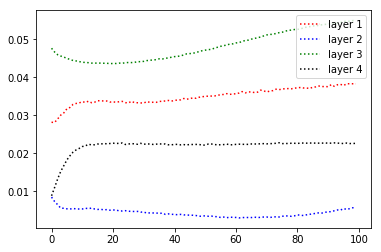

In [9]:
# Access and visualise the weights
weights_t4_L1= []
for epoch, weights in weights_dict_t4.items():
    weights_t4_L1.append(weights[0])
weights_t4_L2= []
for epoch, weights in weights_dict_t4.items():
    weights_t4_L2.append(weights[2])
weights_t4_L3= []
for epoch, weights in weights_dict_t4.items():
    weights_t4_L3.append(weights[4])
weights_t4_L4= []
for epoch, weights in weights_dict_t4.items():
    weights_t4_L4.append(weights[6])
    
t4_aveW_L1= [np.mean(W) for W in weights_t4_L1]
t4_aveW_L2= [np.mean(W) for W in weights_t4_L2]
t4_aveW_L3= [np.mean(W) for W in weights_t4_L3]
t4_aveW_L4= [np.mean(W) for W in weights_t4_L4]

epochs= [ep for ep in range(100)]
plt.plot(epochs, t4_aveW_L1, linestyle='dotted', color= 'red', label='layer 1')
plt.plot(epochs, t4_aveW_L2, linestyle='dotted', color= 'blue', label='layer 2')
plt.plot(epochs, t4_aveW_L3, linestyle='dotted', color= 'green', label='layer 3')
plt.plot(epochs, t4_aveW_L4, linestyle='dotted', color= 'black', label='layer 4')
plt.legend()
plt.show()


In [10]:
# 2. Callback the outputs
# 2.1 Model.Layers.output object
model_t4.layers[0].output
# output to the 1st layer is a Tensor variable object. 
# We need to fit the inputs to this variable to obtain the output values, with backend.function

<tf.Tensor 'dense_5/Tanh:0' shape=(None, 8) dtype=float32>

In [11]:
model_t4= Sequential()
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t4.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

t4_activations= []
def save_act(model):
    output_vars= [layer.output for layer in model.layers]
    get_outputs_funcs= [k.function([model.input], [out]) for out in output_vars]
    # Fit these functions
    layers_acts= [f([X]) for f in get_outputs_funcs]
    t4_activations.append(layers_acts)
# Save activations for all layers for each epoch:
activations_callback_t4=  LambdaCallback \
( on_epoch_end=lambda epoch, logs:  save_act(model_t4))

model_t4.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[activations_callback_t4])


Train on 537 samples, validate on 231 samples
Epoch 1/100
537/537 - 0s - loss: 0.6661 - accuracy: 0.6182 - val_loss: 0.6594 - val_accuracy: 0.6061


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Epoch 2/100
537/537 - 0s - loss: 0.6189 - accuracy: 0.6853 - val_loss: 0.6151 - val_accuracy: 0.6623
Epoch 3/100
537/537 - 0s - loss: 0.5841 - accuracy: 0.7039 - val_loss: 0.5800 - val_accuracy: 0.7056
Epoch 4/100
537/537 - 0s - loss: 0.5595 - accuracy: 0.7225 - val_loss: 0.5506 - val_accuracy: 0.7229
Epoch 5/100
537/537 - 0s - loss: 0.5405 - accuracy: 0.7356 - val_loss: 0.5296 - val_accuracy: 0.7403
Epoch 6/100
537/537 - 0s - loss: 0.5276 - accuracy: 0.7467 - val_loss: 0.5127 - val_accuracy: 0.7532
Epoch 7/100
537/537 - 0s - loss: 0.5187 - accuracy: 0.7542 - val_loss: 0.4991 - val_accuracy: 0.7532
Epoch 8/100
537/537 - 0s - loss: 0.5119 - accuracy: 0.7523 - val_loss: 0.4877 - val_accuracy: 0.7532
Epoch 9/100
537/537 - 0s - loss: 0.5056 - accuracy: 0.7654 - val_loss: 0.4824 - val_accuracy: 0.7619
Epoch 10/100
537/537 - 0s - loss: 0.5016 - accuracy: 0.7691 - val_loss: 0.4764 - val_accuracy: 0.7662
Epoch 11/100
537/537 - 0s - loss: 0.4983 - accuracy: 0.7691 - val_loss: 0.4705 - val_accur

Epoch 83/100
537/537 - 0s - loss: 0.4492 - accuracy: 0.7747 - val_loss: 0.4433 - val_accuracy: 0.7662
Epoch 84/100
537/537 - 0s - loss: 0.4496 - accuracy: 0.7765 - val_loss: 0.4470 - val_accuracy: 0.7619
Epoch 85/100
537/537 - 0s - loss: 0.4481 - accuracy: 0.7747 - val_loss: 0.4445 - val_accuracy: 0.7619
Epoch 86/100
537/537 - 0s - loss: 0.4482 - accuracy: 0.7691 - val_loss: 0.4441 - val_accuracy: 0.7749
Epoch 87/100
537/537 - 0s - loss: 0.4481 - accuracy: 0.7728 - val_loss: 0.4413 - val_accuracy: 0.7662
Epoch 88/100
537/537 - 0s - loss: 0.4485 - accuracy: 0.7728 - val_loss: 0.4425 - val_accuracy: 0.7749
Epoch 89/100
537/537 - 0s - loss: 0.4485 - accuracy: 0.7672 - val_loss: 0.4483 - val_accuracy: 0.7576
Epoch 90/100
537/537 - 0s - loss: 0.4477 - accuracy: 0.7803 - val_loss: 0.4464 - val_accuracy: 0.7749
Epoch 91/100
537/537 - 0s - loss: 0.4469 - accuracy: 0.7672 - val_loss: 0.4415 - val_accuracy: 0.7792
Epoch 92/100
537/537 - 0s - loss: 0.4469 - accuracy: 0.7709 - val_loss: 0.4403 - v

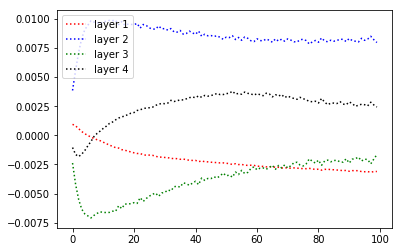

In [12]:
# Access the activations
n_layers= 4; n_epochs =100
layer_sizes= [8,8,8,8]; input_size= X.shape[0]
t4_act_layers= np.zeros((n_layers, n_epochs))
for ep in range(n_epochs):
    for layer in range(n_layers):
        layer_outs_wrt_inputs= np.zeros((layer_sizes[layer], input_size))
        for i in range(input_size):
            perlayer_outs= t4_activations[ep][layer][0][i]
            layer_outs_wrt_inputs[layer, i]= np.mean(perlayer_outs)
        ave_over_inputs= np.mean(layer_outs_wrt_inputs)
        t4_act_layers[layer, ep]= ave_over_inputs

plt.plot(epochs, t4_act_layers[0], linestyle= 'dotted', color= 'red', label= 'layer 1')
plt.plot(epochs, t4_act_layers[1], linestyle= 'dotted', color= 'blue', label= 'layer 2')
plt.plot(epochs, t4_act_layers[2], linestyle= 'dotted', color= 'green', label= 'layer 3')
plt.plot(epochs, t4_act_layers[3], linestyle= 'dotted', color= 'black', label= 'layer 4')
plt.legend()
plt.show()
    


In [13]:
# 3. Tanh model with per-epoch gradients callback
model_t4= Sequential()
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t4.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t4.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

sess = k.get_session()
grads_dict_t4= {}
def save_grads(model, epoch):
    # weight variables for each layer
    weights_vars= [layer.trainable_weights for layer in model.layers]
    # function for output gradients for each weight variable
    get_grads_layers= [k.gradients(model.output, weight) for weight in weights_vars]
    # fit functions to compute gradients for each weight
    grads= [ sess.run(get_grad, feed_dict={model.input: X}) for get_grad in get_grads_layers]
    grads_dict_t4.update({epoch:grads})
    
grads_callback_t4= LambdaCallback \
( on_epoch_end=lambda epoch, logs: save_grads(model_t4, epoch))

model_t4.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[grads_callback_t4])


Train on 537 samples, validate on 231 samples
Epoch 1/100


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



537/537 - 0s - loss: 0.7365 - accuracy: 0.4004 - val_loss: 0.6910 - val_accuracy: 0.5195
Epoch 2/100
537/537 - 0s - loss: 0.6762 - accuracy: 0.5996 - val_loss: 0.6484 - val_accuracy: 0.6840
Epoch 3/100
537/537 - 0s - loss: 0.6392 - accuracy: 0.6909 - val_loss: 0.6162 - val_accuracy: 0.7359
Epoch 4/100
537/537 - 0s - loss: 0.6106 - accuracy: 0.6946 - val_loss: 0.5915 - val_accuracy: 0.7273
Epoch 5/100
537/537 - 0s - loss: 0.5884 - accuracy: 0.7095 - val_loss: 0.5651 - val_accuracy: 0.7273
Epoch 6/100
537/537 - 0s - loss: 0.5665 - accuracy: 0.7225 - val_loss: 0.5435 - val_accuracy: 0.7489
Epoch 7/100
537/537 - 0s - loss: 0.5499 - accuracy: 0.7281 - val_loss: 0.5233 - val_accuracy: 0.7446
Epoch 8/100
537/537 - 0s - loss: 0.5358 - accuracy: 0.7318 - val_loss: 0.5055 - val_accuracy: 0.7532
Epoch 9/100
537/537 - 0s - loss: 0.5244 - accuracy: 0.7467 - val_loss: 0.4909 - val_accuracy: 0.7619
Epoch 10/100
537/537 - 0s - loss: 0.5151 - accuracy: 0.7561 - val_loss: 0.4817 - val_accuracy: 0.7792
E

Epoch 82/100
537/537 - 1s - loss: 0.4470 - accuracy: 0.7821 - val_loss: 0.4379 - val_accuracy: 0.8009
Epoch 83/100
537/537 - 1s - loss: 0.4453 - accuracy: 0.7803 - val_loss: 0.4419 - val_accuracy: 0.7965
Epoch 84/100
537/537 - 1s - loss: 0.4441 - accuracy: 0.7803 - val_loss: 0.4417 - val_accuracy: 0.8009
Epoch 85/100
537/537 - 1s - loss: 0.4440 - accuracy: 0.7840 - val_loss: 0.4399 - val_accuracy: 0.7965
Epoch 86/100
537/537 - 1s - loss: 0.4439 - accuracy: 0.7858 - val_loss: 0.4398 - val_accuracy: 0.7922
Epoch 87/100
537/537 - 1s - loss: 0.4422 - accuracy: 0.7858 - val_loss: 0.4397 - val_accuracy: 0.7879
Epoch 88/100
537/537 - 1s - loss: 0.4436 - accuracy: 0.7821 - val_loss: 0.4428 - val_accuracy: 0.7922
Epoch 89/100
537/537 - 1s - loss: 0.4418 - accuracy: 0.7914 - val_loss: 0.4420 - val_accuracy: 0.7965
Epoch 90/100
537/537 - 1s - loss: 0.4424 - accuracy: 0.7858 - val_loss: 0.4450 - val_accuracy: 0.7922
Epoch 91/100
537/537 - 1s - loss: 0.4421 - accuracy: 0.7765 - val_loss: 0.4406 - v

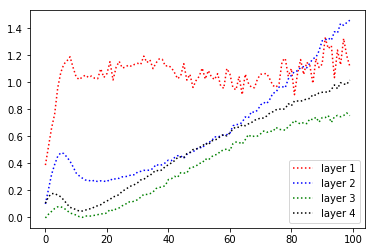

In [14]:
len(grads_dict_t4)  # 100 for 100 epochs
grads_dict_t4[0]    # output grads on the 1st epoch: first 2 weight-bias combo are for 1st and 2nd layers
# for each epoch, we need weight-bias for all hidden layers
n_epochs= 100

grads_t4_arr= np.zeros((n_layers, n_epochs))
for ep in range(n_epochs):
    for l in range(n_layers):
        # grads for all hidden layers on the current epoch
        all_hid_grads= grads_dict_t4[ep][:n_layers]
        # from current layer [l] grads, extract the weight [0]
        grad_perlayer= all_hid_grads[l][0]
        # save average output gradient
        grads_t4_arr[l,ep]= np.mean(grad_perlayer)
        
epochs= [ep for ep in range(n_epochs)]
plt.plot(epochs, grads_t4_arr[0], linestyle= 'dotted', color= 'red', label='layer 1')
plt.plot(epochs, grads_t4_arr[1], linestyle= 'dotted', color= 'blue', label='layer 2')
plt.plot(epochs, grads_t4_arr[2], linestyle= 'dotted', color= 'green', label='layer 3')
plt.plot(epochs, grads_t4_arr[3], linestyle= 'dotted', color= 'black', label='layer 4')
plt.legend()
plt.show()

